In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit
plt.rcParams['figure.dpi']=300

In [8]:
@jit(nopython=True)
def initialize_lattice(size):
    lattice = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            if np.random.random() >= 0.75:
                lattice[i, j] = 1
            else:
                lattice[i, j] = -1
    return lattice

In [9]:
# energy calculation
@jit(nopython=True)
def calculate_energy(lattice):
    energy = 0
    size = lattice.shape[0]
    for i in range(size):
        for j in range(size):
            spin = lattice[i, j]
            neighbors = lattice[(i + 1) % size, j] + lattice[i, (j + 1) % size] + lattice[(i - 1) % size, j] + lattice[i, (j - 1) % size]
            energy += -spin * neighbors
    return energy

# Magnetization calculation
@jit(nopython=True)
def calculate_magnetization(lattice):
    return np.sum(lattice)

In [5]:
# Metropolis steps
@jit(nopython=True)
def metropolis_step(lattice, temperature):
    size = lattice.shape[0]
    i = np.random.randint(size)
    j = np.random.randint(size)
    spin = lattice[i, j]
    neighbors = lattice[(i + 1) % size, j] + lattice[i, (j + 1) % size] + lattice[(i - 1) % size, j] + lattice[i, (j - 1) % size]
    energy_diff = 2 * spin * neighbors
    if energy_diff < 0 or np.random.rand() < np.exp(-energy_diff / temperature):
        lattice[i, j] = -spin
    return lattice




In [6]:
# Simulation
def run_simulation(size, temperature, num_steps, equilibration_steps):    
    lattice = initialize_lattice(size)
    Lattice_init = None
    Lattice_eq = None
    if (temperature>1.2 and temperature<=1.3) or (temperature>2.3 and temperature<=2.4) or (temperature>3.7 and temperature<=3.8):
        Lattice_init=lattice.copy()
    energy_vals = []
    magnetization_vals = []
    for step in range(num_steps):
        for _ in range(equilibration_steps):
            lattice = metropolis_step(lattice, temperature)
        energy = calculate_energy(lattice)
        magnetization = calculate_magnetization(lattice)
        energy_vals.append(energy)
        magnetization_vals.append(magnetization)
    if (temperature>1.2 and temperature<=1.3) or (temperature>2.3 and temperature<=2.4) or (temperature>3.7 and temperature<=3.8):
        Lattice_eq=lattice.copy()
    return energy_vals, magnetization_vals, Lattice_init, Lattice_eq 



In [10]:
# calculate heat capacity
def calculate_specific_heat(energy_vals, temperature):
    energy_squared = np.mean(np.array(energy_vals) ** 2)
    energy_mean = np.mean(energy_vals)
    return ((energy_squared - energy_mean ** 2) / (temperature**2))

# calculate magnetic susceptibility
def calculate_magnetic_susceptibility(magnetization_vals, temperature):
    magnetization_squared = np.mean(np.array(magnetization_vals) ** 2)
    magnetization_mean = np.mean(magnetization_vals)
    return ((magnetization_squared - magnetization_mean ** 2) / temperature)

# calculate binder cumulant
def calculate_binder_cumulant(magnetization_vals):
    magnetization_fourth = np.mean(np.array(magnetization_vals) ** 4)
    magnetization_squared = np.mean(np.array(magnetization_vals) ** 2)
    return 1 - magnetization_fourth / (3 * magnetization_squared ** 2)

In [37]:
# Define your parameters
temperatures = np.linspace(1.0, 4.0, num=100)  # replace with your temperature range
num_steps = 2000  # number of steps in the simulation
equilibration_steps = 1500  # number of steps for the system to reach equilibrium

# List of lattice sizes
sizes = [20, 30]


# Run the simulation for each size (size=30)
for size in sizes:
    # Initialize DataFrame
    df = pd.DataFrame()

    for temperature in temperatures:
        # Run the simulation
        if temperature==2:
                energy_vals, magnetization_vals, Lattice_init_30, Lattice_eq_30 = run_simulation(size, temperature, num_steps, equilibration_steps)
        else:
                energy_vals, magnetization_vals, Lattice_init_N, Lattice_eq_N = run_simulation(size, temperature, num_steps, equilibration_steps)
        energy_mean=calculate_mean(energy_vals)
        magnetization_mean=calculate_mean(magnetization_vals)


        # Calculate other observables
        specific_heat = calculate_specific_heat(energy_vals, temperature)
        magnetic_susceptibility = calculate_magnetic_susceptibility(magnetization_vals, temperature)
        binder_cumulant = calculate_binder_cumulant(magnetization_vals)

        # Create a DataFrame for this temperature
        data = {
            'Temperature': [temperature],
            'Heat Capacity': [specific_heat],
            'Magnetic Susceptibility': [magnetic_susceptibility],
            'Mean Energy': [energy_mean],
            'Mean Magnetization': [magnetization_mean],
            'Binder Cumulant': [binder_cumulant],
        }
        df_temp = pd.DataFrame(data)

        # Append to the main DataFrame
        df = df.append(df_temp, ignore_index=True)

    # Save to Excel
    df.to_excel(f'lattice_{size}.xlsx', index=False)


In [15]:
# Define your parameters
temperatures = np.linspace(1.0, 4.0, num=100)  # replace with your temperature range
num_steps = 5000  # number of steps in the simulation
equilibration_steps = 4500  # number of steps for the system to reach equilibrium

# List of lattice sizes
#sizes = [10, 20, 30, 40, 50]
sizes = [50]

# Run the simulation for each size (size=50)
for size in sizes:
    # Initialize DataFrame
    df = pd.DataFrame()

    for temperature in temperatures:
        # Run the simulation
        if temperature>1.2 and temperature<=1.3:
            energy_vals, magnetization_vals, Lattice_init_12, Lattice_eq_12 = run_simulation(size, temperature, num_steps, equilibration_steps)
        elif temperature>2.3 and temperature<=2.4:
            energy_vals, magnetization_vals, Lattice_init_Tc, Lattice_eq_Tc = run_simulation(size, temperature, num_steps, equilibration_steps)
        elif temperature>3.7 and temperature<=3.8:
            energy_vals, magnetization_vals, Lattice_init_38, Lattice_eq_38 = run_simulation(size, temperature, num_steps, equilibration_steps)
        else:
            energy_vals, magnetization_vals, Lattice_init_N, Lattice_eq_N = run_simulation(size, temperature, num_steps, equilibration_steps)
        energy_mean=calculate_mean(energy_vals)
        magnetization_mean=calculate_mean(magnetization_vals)


        # Calculate other observables
        specific_heat = calculate_specific_heat(energy_vals, temperature)
        magnetic_susceptibility = calculate_magnetic_susceptibility(magnetization_vals, temperature)
        binder_cumulant = calculate_binder_cumulant(magnetization_vals)

        # Create a DataFrame for this temperature
        data = {
            'Temperature': [temperature],
            'Heat Capacity': [specific_heat],
            'Magnetic Susceptibility': [magnetic_susceptibility],
            'Mean Energy': [energy_mean],
            'Mean Magnetization': [magnetization_mean],
            'Binder Cumulant': [binder_cumulant],
        }
        df_temp = pd.DataFrame(data)

        # Append to the main DataFrame
        df = df.append(df_temp, ignore_index=True)

    # Save to Excel
    df.to_excel(f'lattice_{size}.xlsx', index=False)


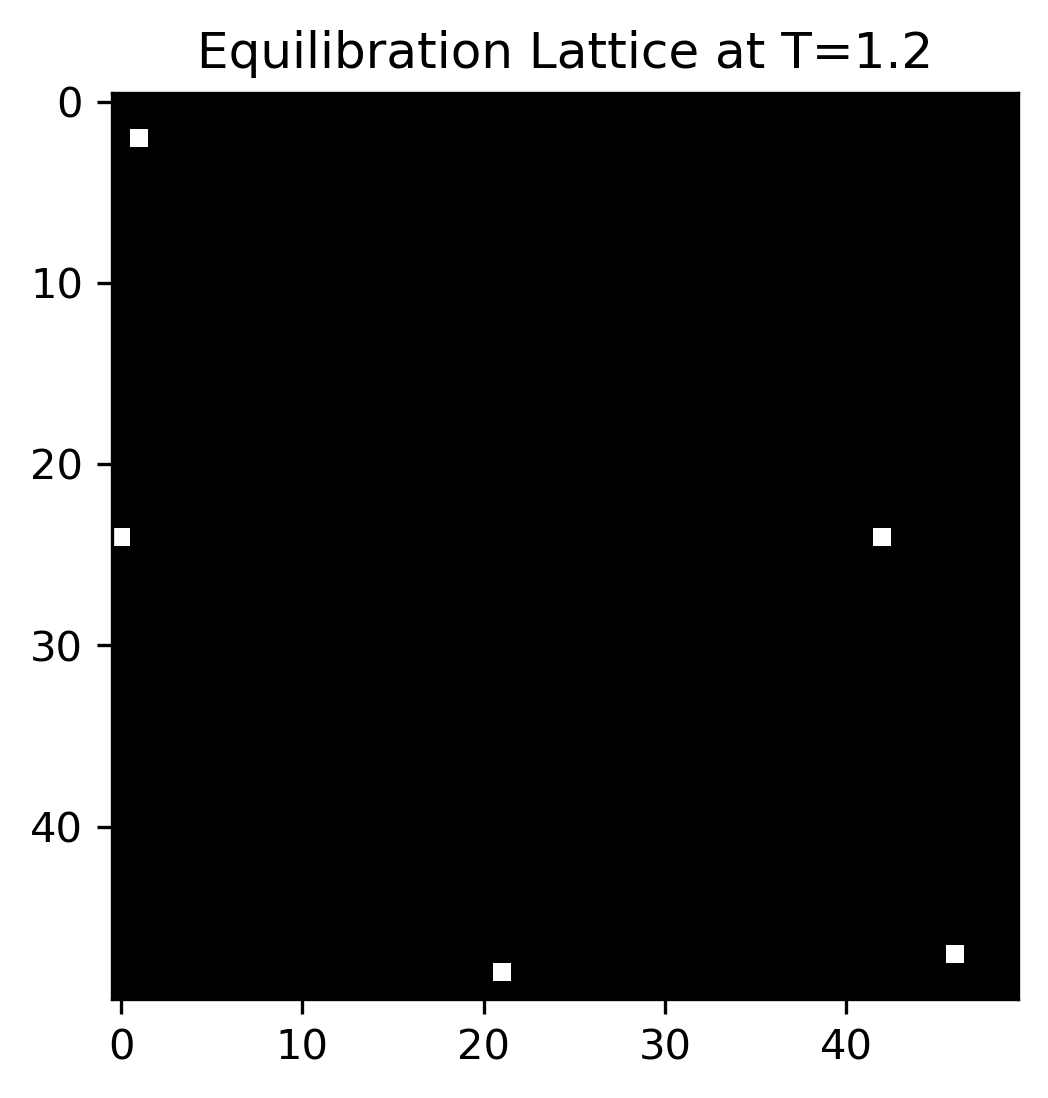

In [31]:
plt.figure()
plt.imshow(Lattice_eq_12, cmap='gray')
plt.title('Equilibration Lattice at T=1.2')
plt.savefig("Lattice at T_1_2.jpg")

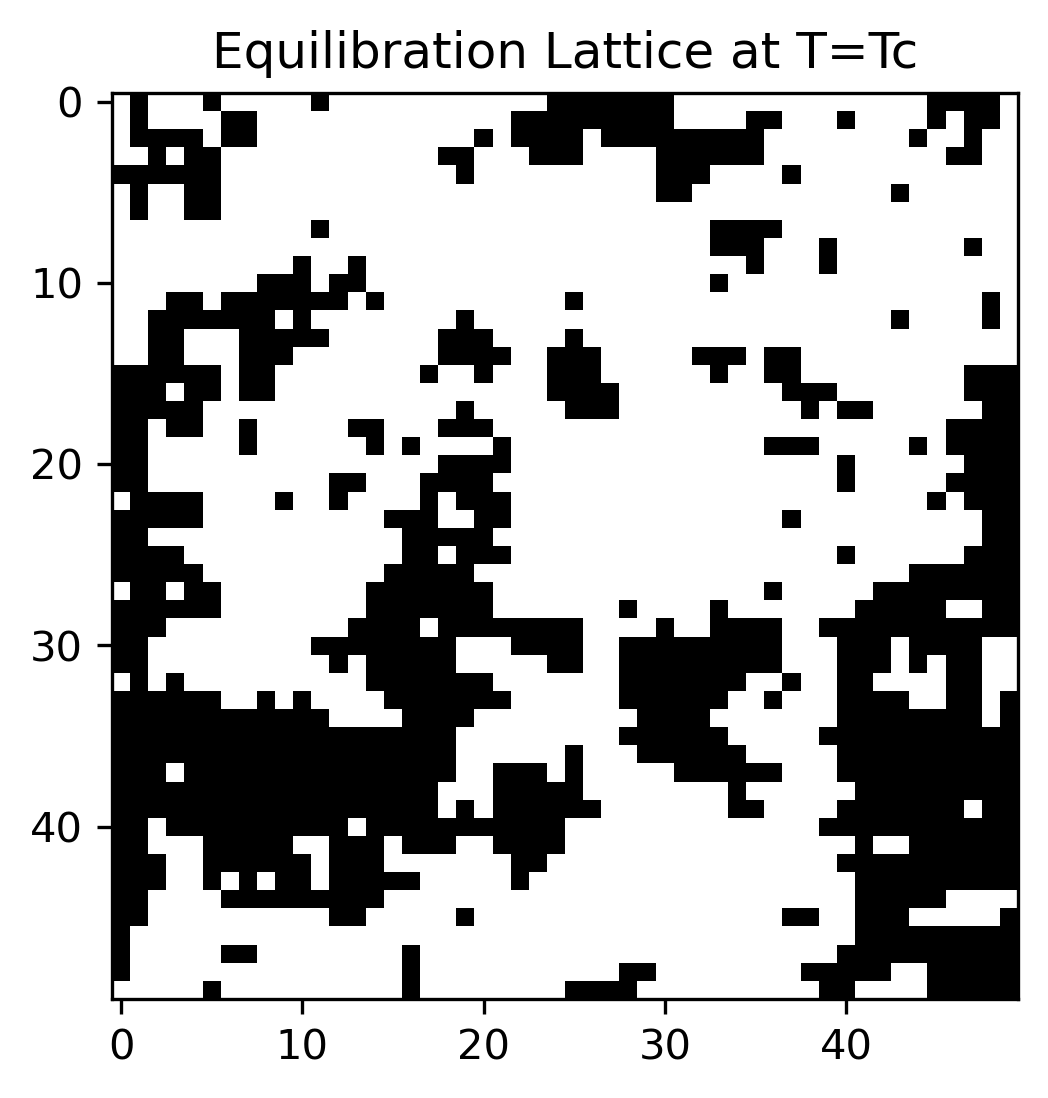

In [32]:
plt.figure()
plt.imshow(Lattice_eq_Tc, cmap='gray')
plt.title('Equilibration Lattice at T=Tc')
plt.savefig("Lattice at Tc.jpg")

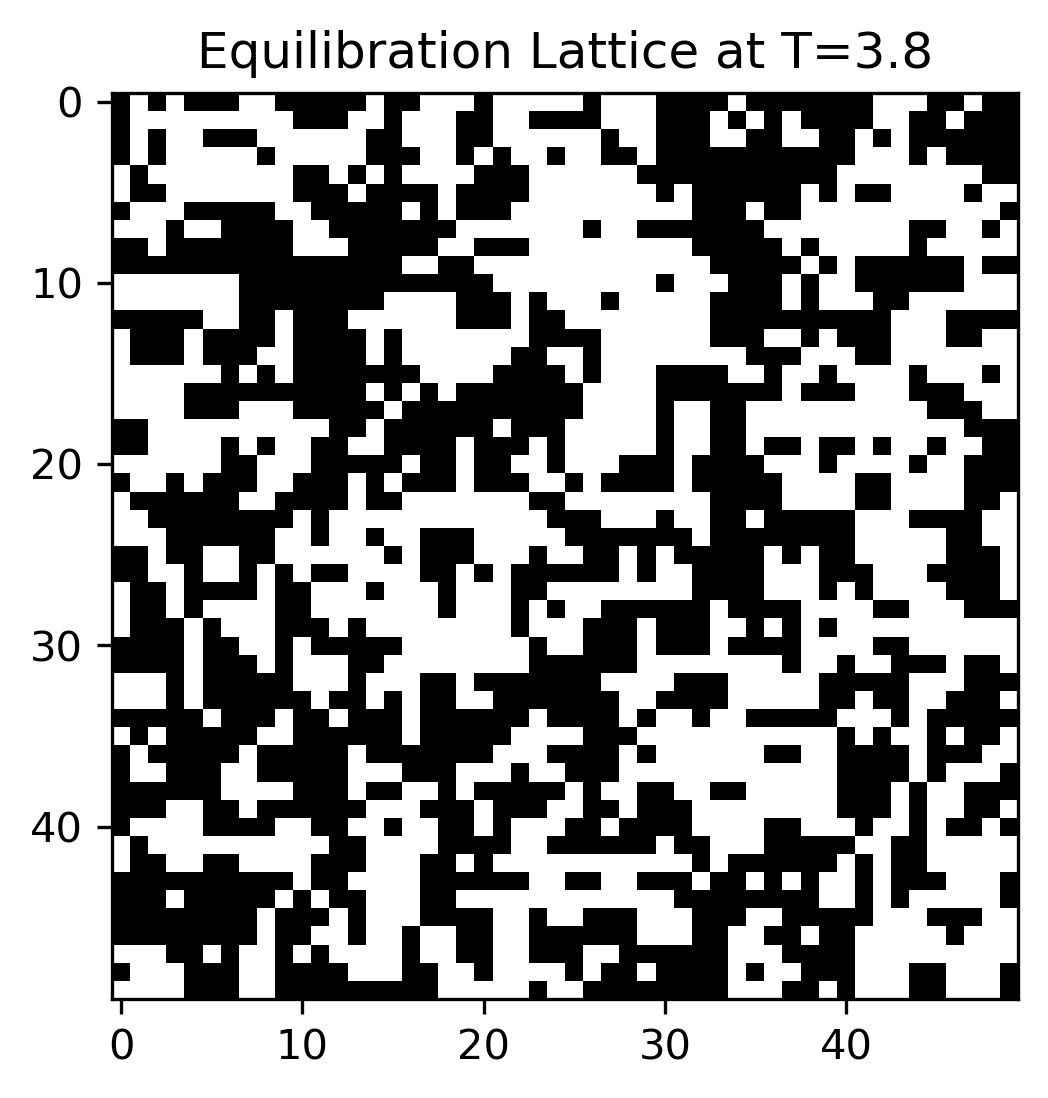

In [33]:
plt.figure()
plt.imshow(Lattice_eq_38, cmap='gray')
plt.title('Equilibration Lattice at T=3.8')
plt.savefig("Lattice at T_3_8.jpg")


In [42]:
# Define your parameters
temperatures = np.linspace(1.0, 4.0, num=100)  # replace with your temperature range
num_steps = 4000  # number of steps in the simulation
equilibration_steps = 3000  # number of steps for the system to reach equilibrium

# List of lattice sizes
sizes = [40, 50]


# Run the simulation for each size (size=30)
for size in sizes:
    # Initialize DataFrame
    df = pd.DataFrame()

    for temperature in temperatures:
        # Run the simulation
        if temperature==2:
                energy_vals, magnetization_vals, Lattice_init_30, Lattice_eq_30 = run_simulation(size, temperature, num_steps, equilibration_steps)
        else:
                energy_vals, magnetization_vals, Lattice_init_N, Lattice_eq_N = run_simulation(size, temperature, num_steps, equilibration_steps)
        energy_mean=calculate_mean(energy_vals)
        magnetization_mean=calculate_mean(magnetization_vals)


        # Calculate other observables
        specific_heat = calculate_specific_heat(energy_vals, temperature)
        magnetic_susceptibility = calculate_magnetic_susceptibility(magnetization_vals, temperature)
        binder_cumulant = calculate_binder_cumulant(magnetization_vals)

        # Create a DataFrame for this temperature
        data = {
            'Temperature': [temperature],
            'Heat Capacity': [specific_heat],
            'Magnetic Susceptibility': [magnetic_susceptibility],
            'Mean Energy': [energy_mean],
            'Mean Magnetization': [magnetization_mean],
            'Binder Cumulant': [binder_cumulant],
        }
        df_temp = pd.DataFrame(data)

        # Append to the main DataFrame
        df = df.append(df_temp, ignore_index=True)

    # Save to Excel
    df.to_excel(f'lattice_{size}.xlsx', index=False)


In [18]:
# reading data obtained from the metropolis algorithm
lattice_10 = pd.read_excel("lattice_10.xlsx", skiprows=1, header=None)
lattice_20 = pd.read_excel("lattice_20.xlsx", skiprows=1, header=None)
lattice_30 = pd.read_excel("lattice_30.xlsx", skiprows=1, header=None)
lattice_40 = pd.read_excel("lattice_40.xlsx", skiprows=1, header=None)
lattice_50 = pd.read_excel("lattice_50.xlsx", skiprows=1, header=None)
temperature = np.array(lattice_10.iloc[:, 0])

# Magnetic Susceptibility
MS_10 = np.array(lattice_10.iloc[:, 2])
MS_20 = np.array(lattice_20.iloc[:, 2])
MS_30 = np.array(lattice_30.iloc[:, 2])
MS_40 = np.array(lattice_40.iloc[:, 2])
MS_50 = np.array(lattice_50.iloc[:, 2])

# Heat Capacity
HC_10 = np.array(lattice_10.iloc[:, 1])
HC_20 = np.array(lattice_20.iloc[:, 1])
HC_30 = np.array(lattice_30.iloc[:, 1])
HC_40 = np.array(lattice_40.iloc[:, 1])
HC_50 = np.array(lattice_50.iloc[:, 1])


# Mean energy
ME_10 = np.array(lattice_10.iloc[:, 3])
ME_20 = np.array(lattice_20.iloc[:, 3])
ME_30 = np.array(lattice_30.iloc[:, 3])
ME_40 = np.array(lattice_40.iloc[:, 3])
ME_50 = np.array(lattice_50.iloc[:, 3])

# Mean magnetisation
MM_10 = np.array(lattice_10.iloc[:, 4])
MM_20 = np.array(lattice_20.iloc[:, 4])
MM_30 = np.array(lattice_30.iloc[:, 4])
MM_40 = np.array(lattice_40.iloc[:, 4])
MM_50 = np.array(lattice_50.iloc[:, 4])

# binder cumulant
BC_10 = np.array(lattice_10.iloc[:, 5])
BC_20 = np.array(lattice_20.iloc[:, 5])
BC_30 = np.array(lattice_30.iloc[:, 5])
BC_40 = np.array(lattice_40.iloc[:, 5])
BC_50 = np.array(lattice_50.iloc[:, 5])

# Calculating the Curie temperature
MS = [MS_10, MS_20, MS_30, MS_40, MS_50, HC_10, HC_20, HC_30, HC_40, HC_50]
Critical_temps = []
for i in MS:
    max_temp = temperature[np.argmax(i)]
    Critical_temps.append(max_temp)
curie_temp = np.mean(Critical_temps)
err = np.std(Critical_temps)
print(Critical_temps)
print(curie_temp, '', err)



[1.939393939393939, 2.121212121212121, 2.363636363636364, 2.242424242424242, 2.272727272727272, 2.363636363636364, 2.242424242424242, 2.272727272727272, 2.242424242424242, 2.242424242424242]
2.2303030303030305  0.11673551687429243


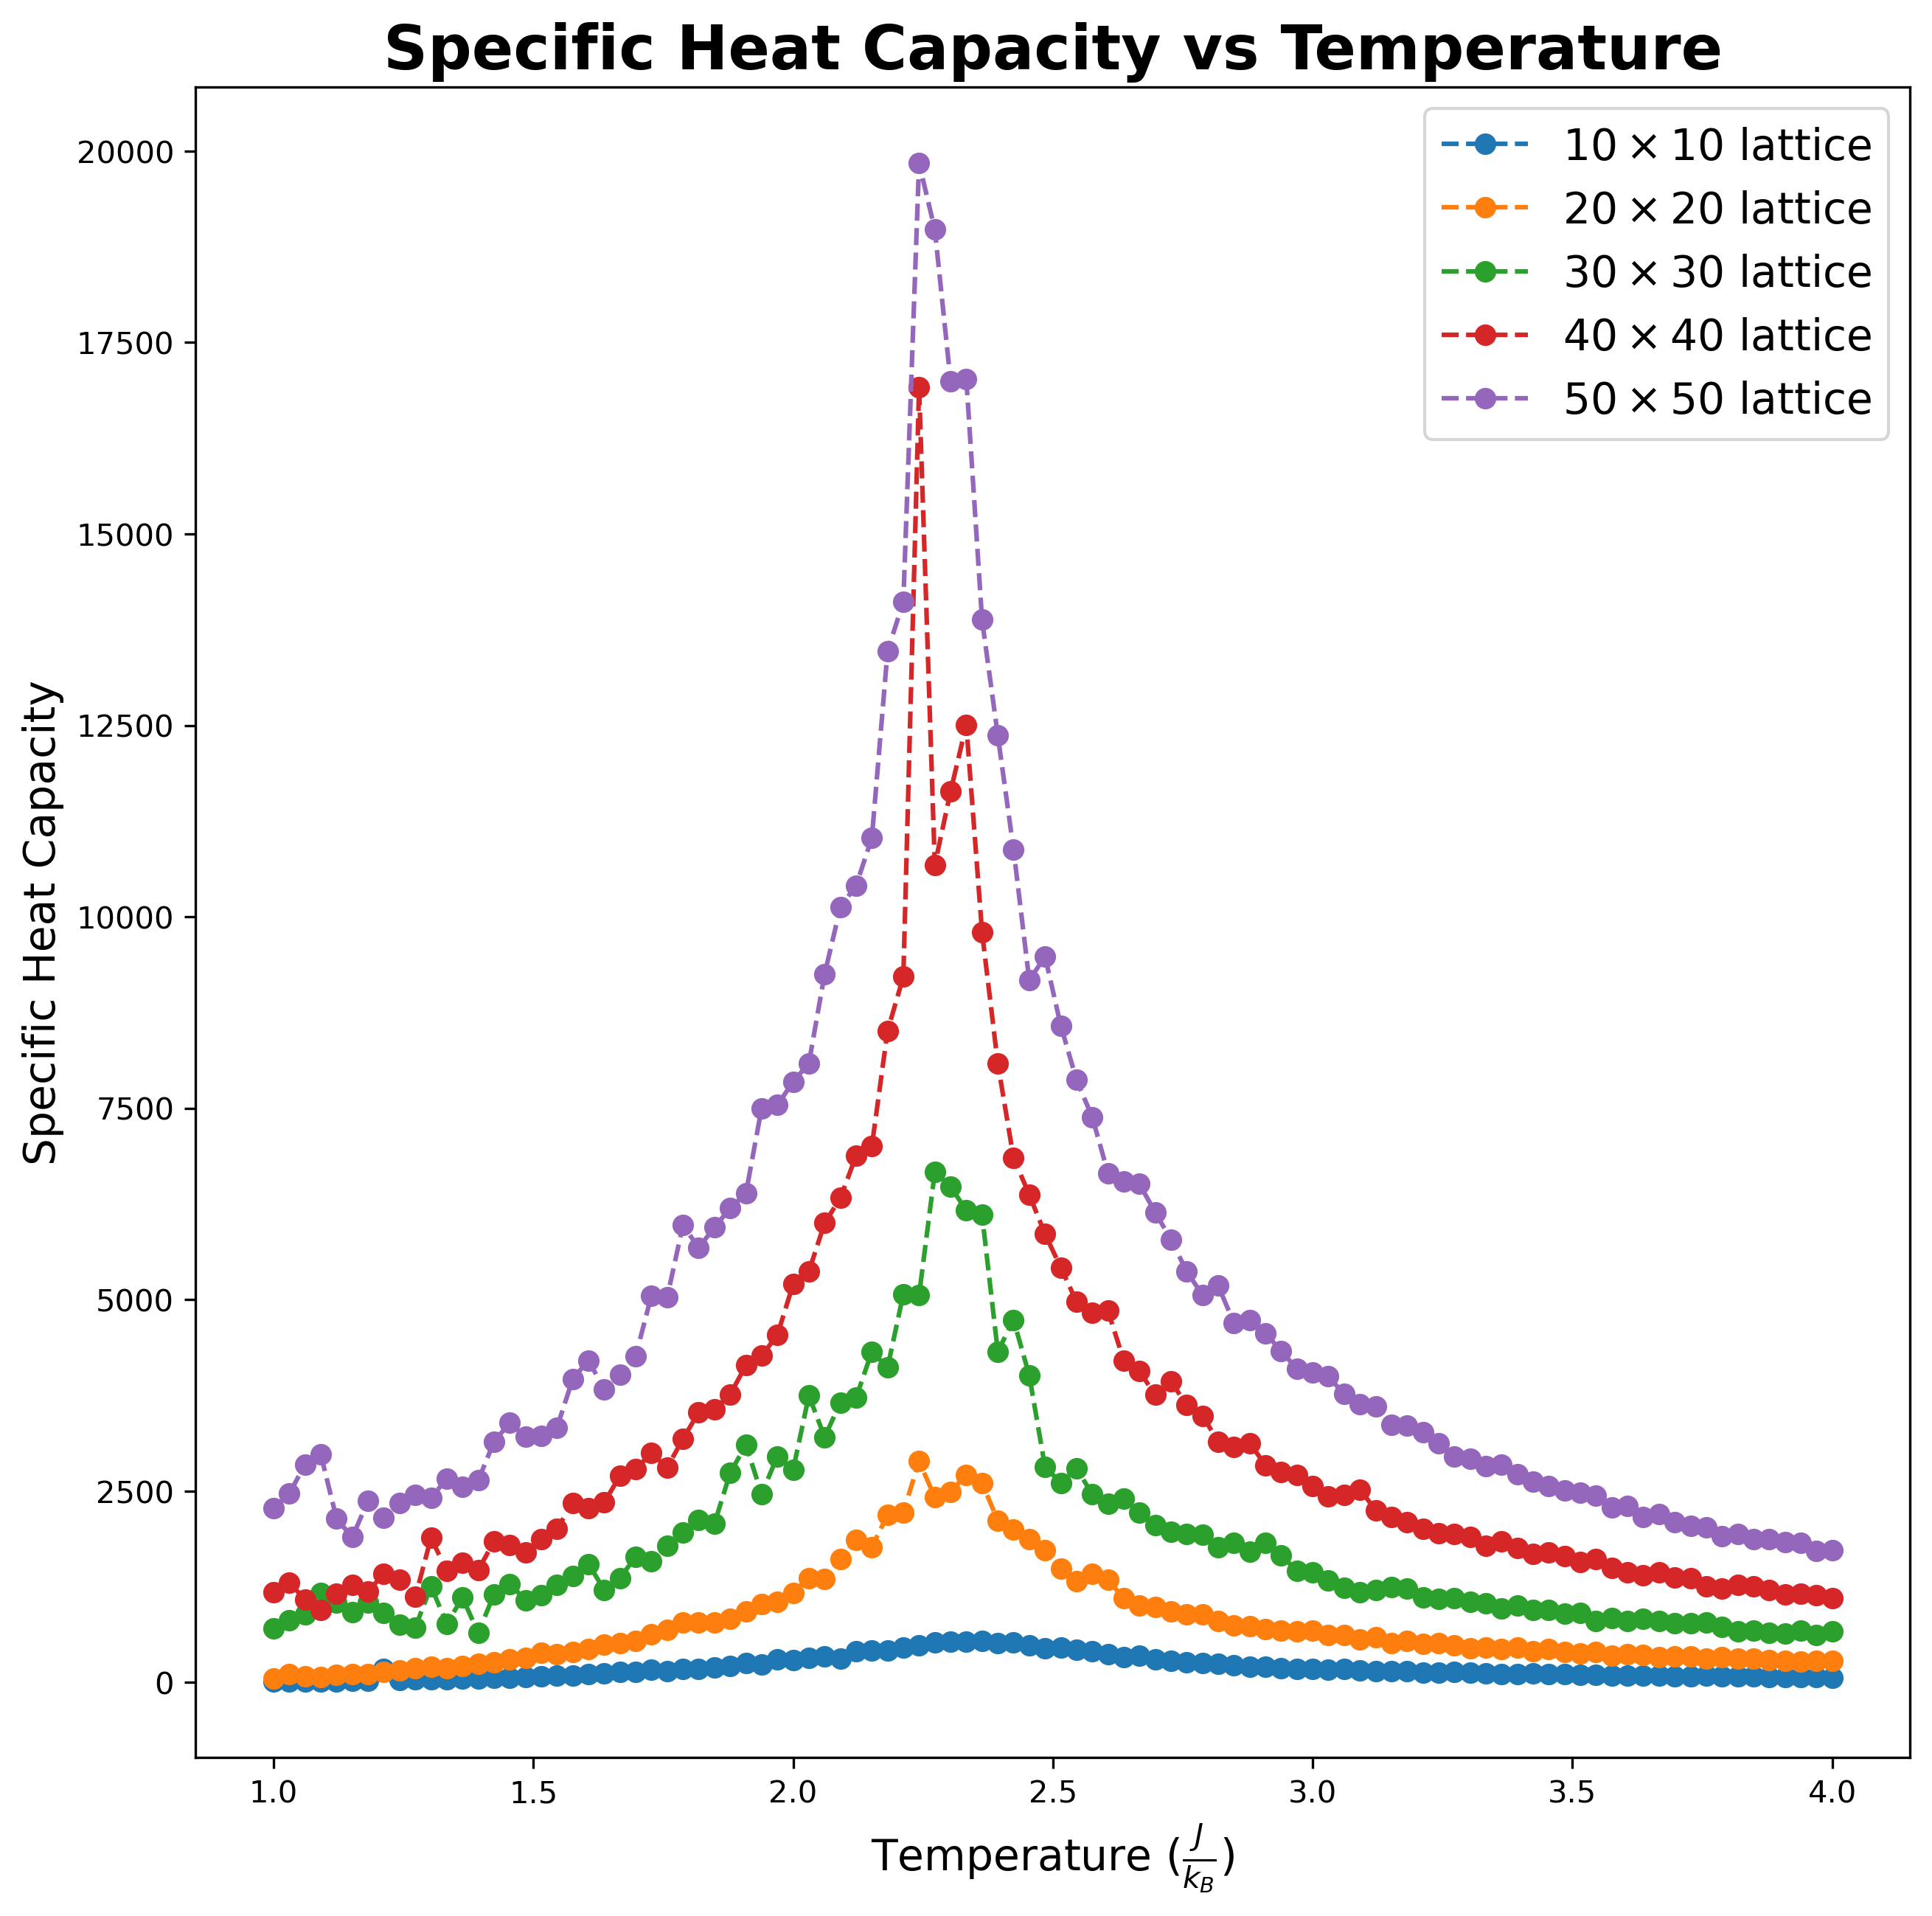

In [41]:
# plot heat capacity
plt.figure(figsize=(10,10))
plt.plot(temperature, HC_10, 'o--', label='$10 \\times 10$ lattice')
plt.plot(temperature, HC_20, 'o--', label='$20 \\times 20$ lattice')
plt.plot(temperature, HC_30, 'o--', label='$30 \\times 30$ lattice')
plt.plot(temperature, HC_40, 'o--', label='$40 \\times 40$ lattice')
plt.plot(temperature, HC_50, 'o--', label='$50 \\times 50$ lattice')
plt.title('Specific Heat Capacity vs Temperature', fontsize=20, fontweight='bold')
plt.xlabel('Temperature ($\\frac{J}{k_B}$)',fontsize=14)
plt.ylabel('Specific Heat Capacity',fontsize=14)
plt.legend(fontsize=14)
plt.savefig("HC_vs temp.jpg")


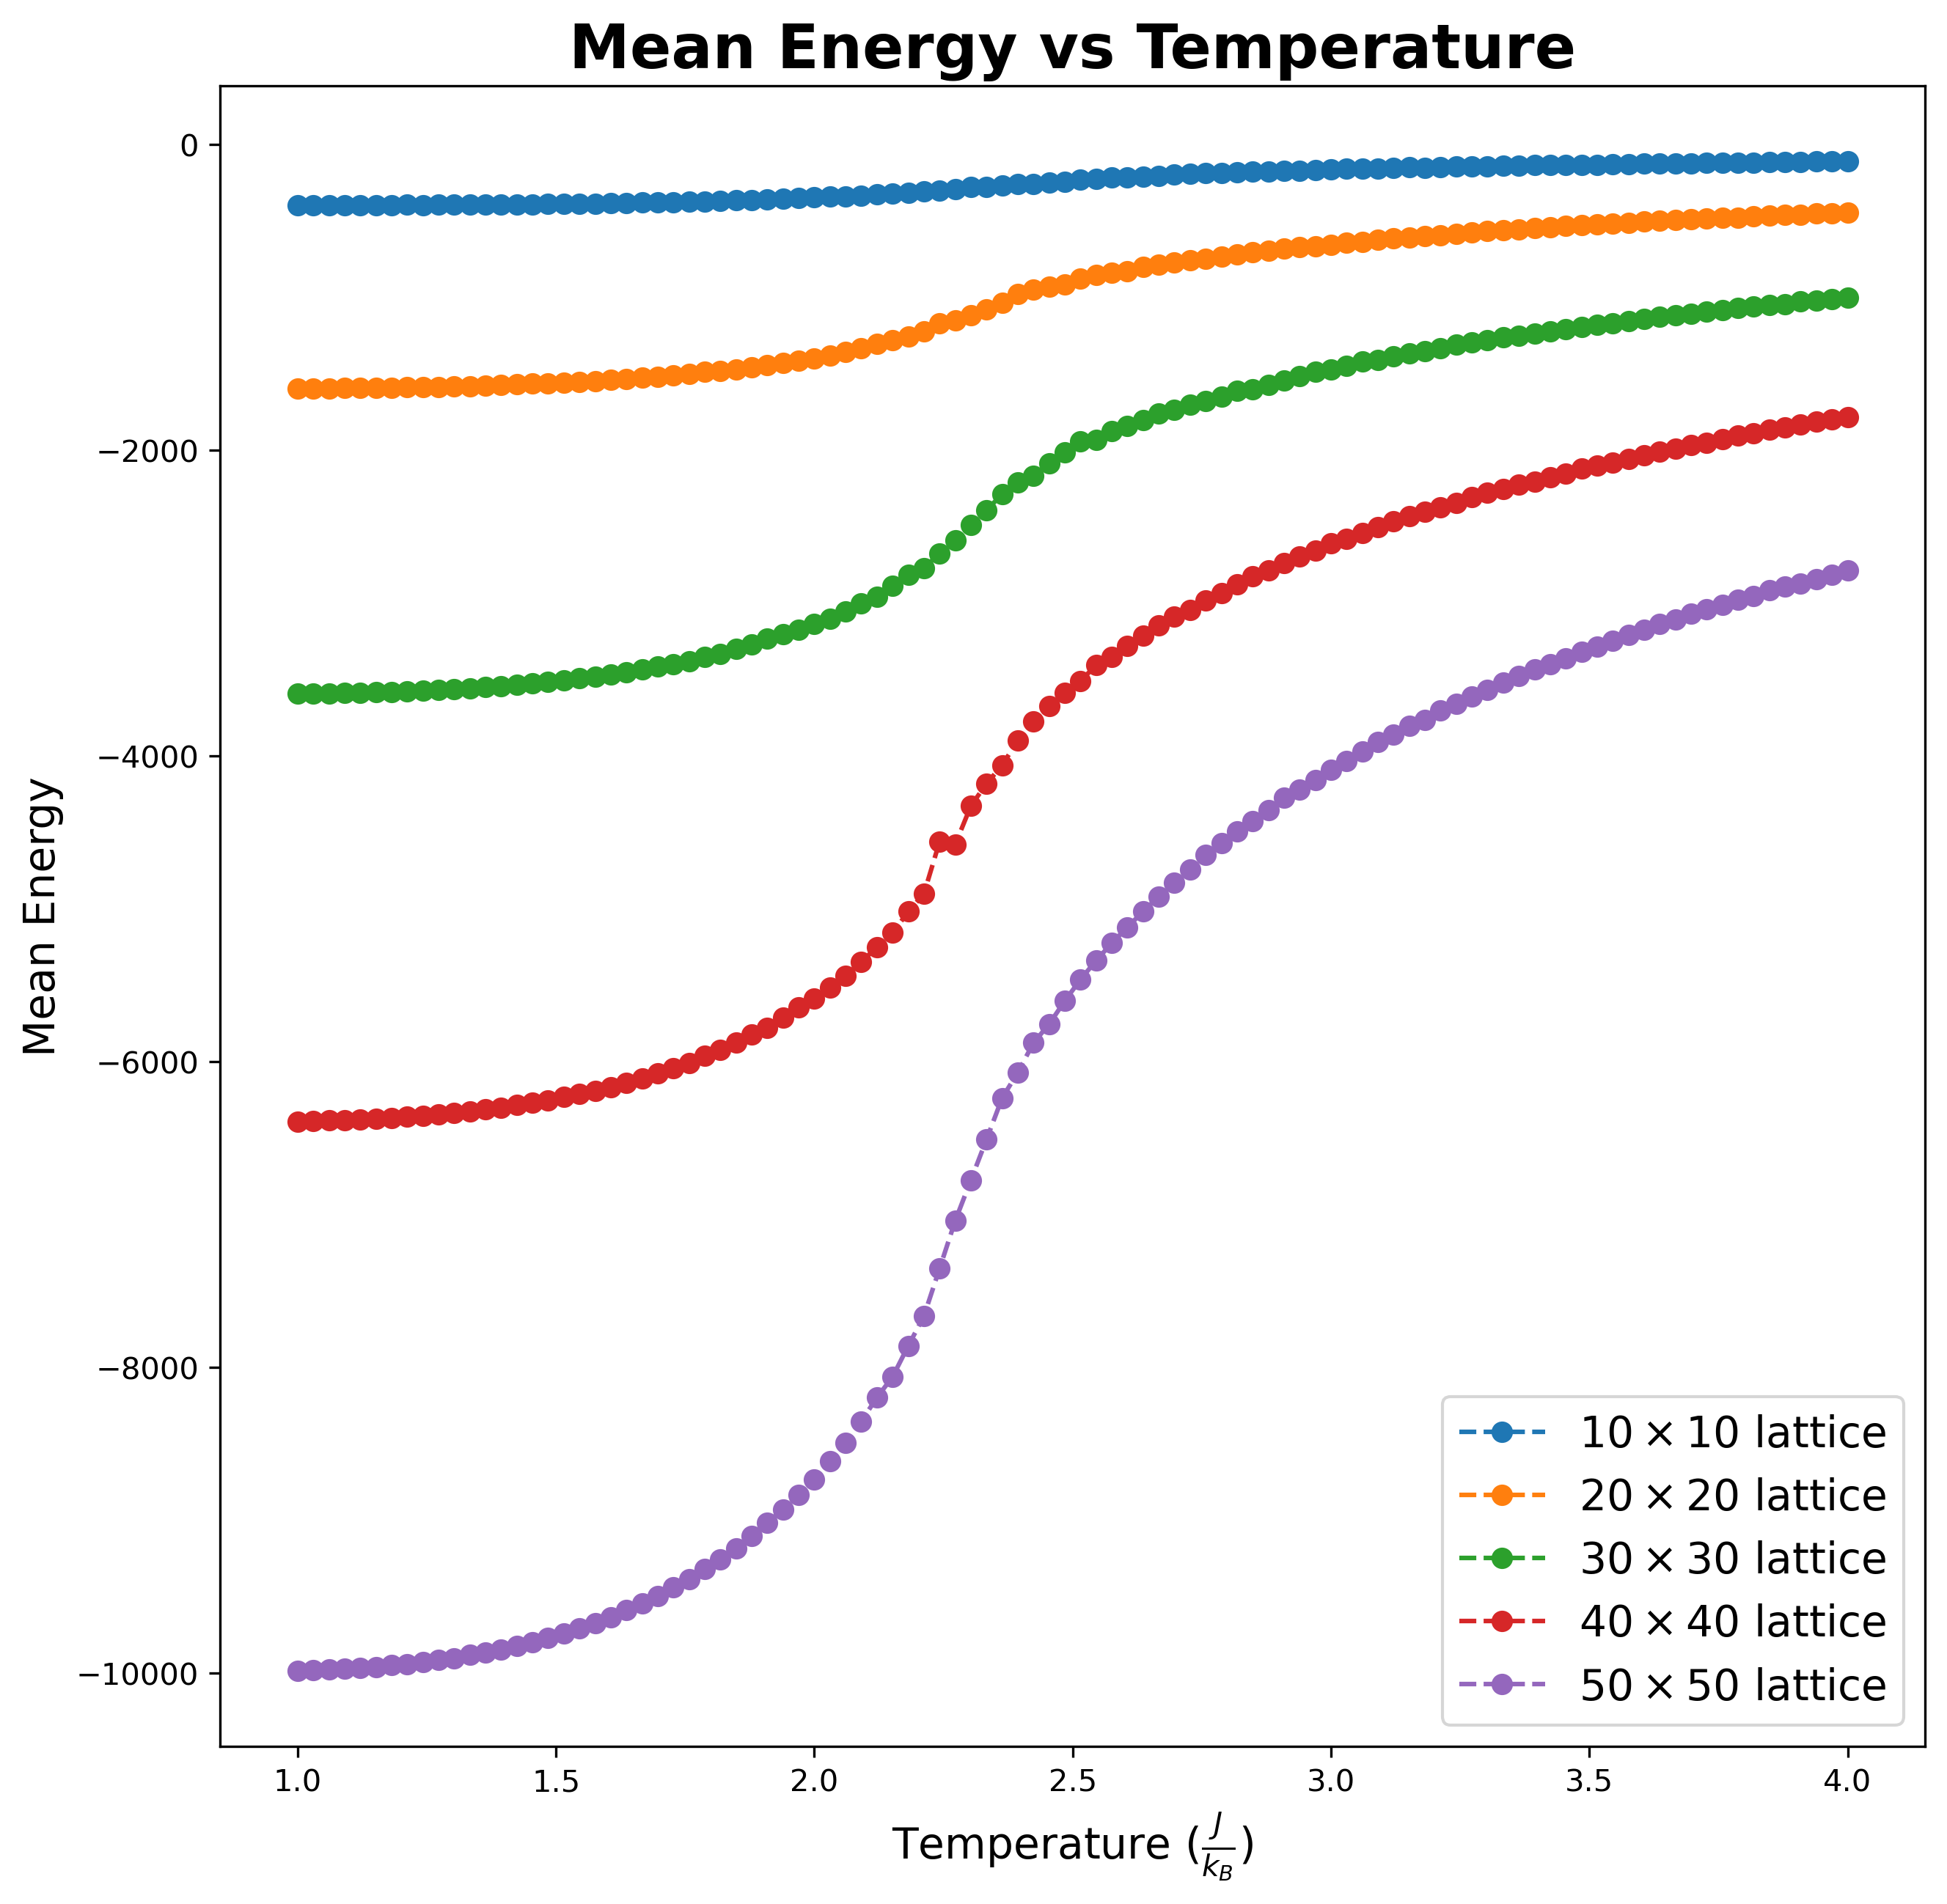

In [42]:
# plot mean energy
plt.figure(figsize=(10,10))
plt.plot(temperature, ME_10, 'o--', label='$10 \\times 10$ lattice')
plt.plot(temperature, ME_20, 'o--', label='$20 \\times 20$ lattice')
plt.plot(temperature, ME_30, 'o--', label='$30 \\times 30$ lattice')
plt.plot(temperature, ME_40, 'o--', label='$40 \\times 40$ lattice')
plt.plot(temperature, ME_50, 'o--', label='$50 \\times 50$ lattice')
plt.title('Mean Energy vs Temperature', fontsize=20, fontweight='bold')
plt.xlabel('Temperature ($\\frac{J}{k_B}$)',fontsize=14)
plt.ylabel('Mean Energy',fontsize=14)
plt.legend(fontsize=14)
plt.savefig("ME_vs temp.jpg")



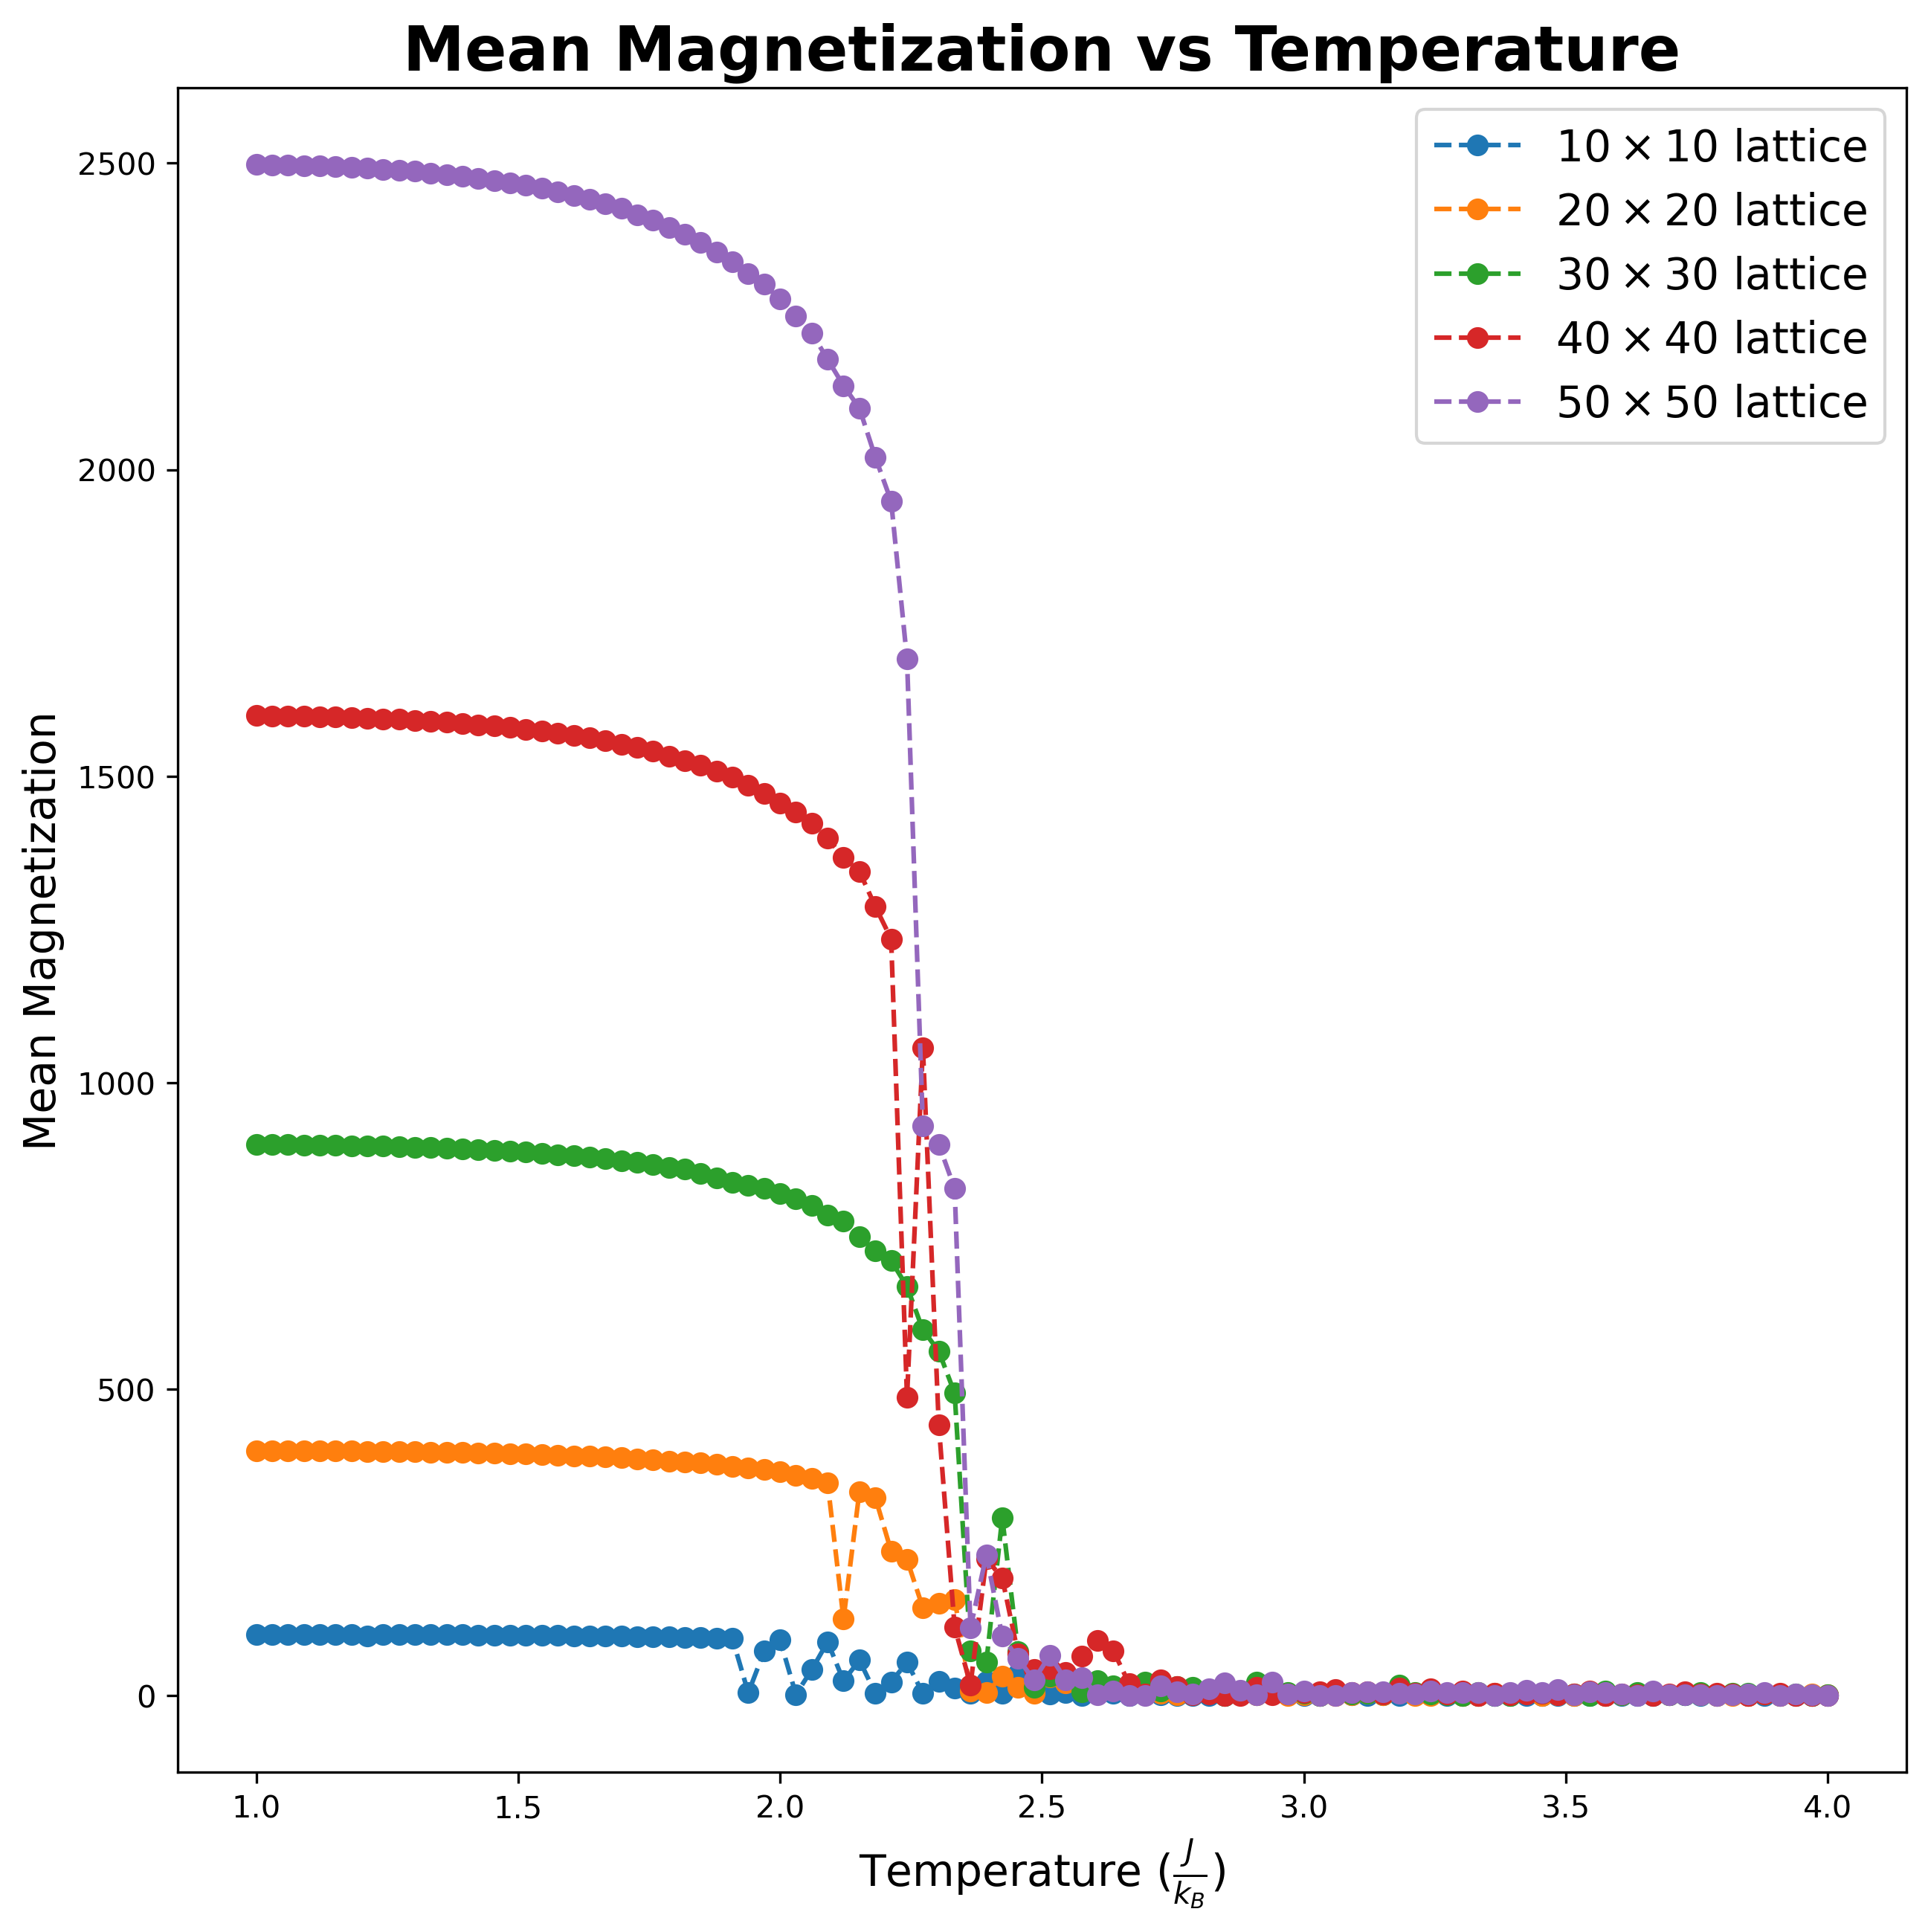

In [43]:
# plot mean magnetization
plt.figure(figsize=(10,10))
plt.plot(temperature, abs(MM_10), 'o--', label='$10 \\times 10$ lattice')
plt.plot(temperature, abs(MM_20), 'o--', label='$20 \\times 20$ lattice')
plt.plot(temperature, abs(MM_30), 'o--', label='$30 \\times 30$ lattice')
plt.plot(temperature, abs(MM_40), 'o--', label='$40 \\times 40$ lattice')
plt.plot(temperature, abs(MM_50), 'o--', label='$50 \\times 50$ lattice')
plt.title('Mean Magnetization vs Temperature', fontsize=20, fontweight='bold')
plt.xlabel('Temperature ($\\frac{J}{k_B}$)',fontsize=14)
plt.ylabel('Mean Magnetization',fontsize=14)
plt.legend(fontsize=14)
plt.savefig("MM_vs temp.jpg")



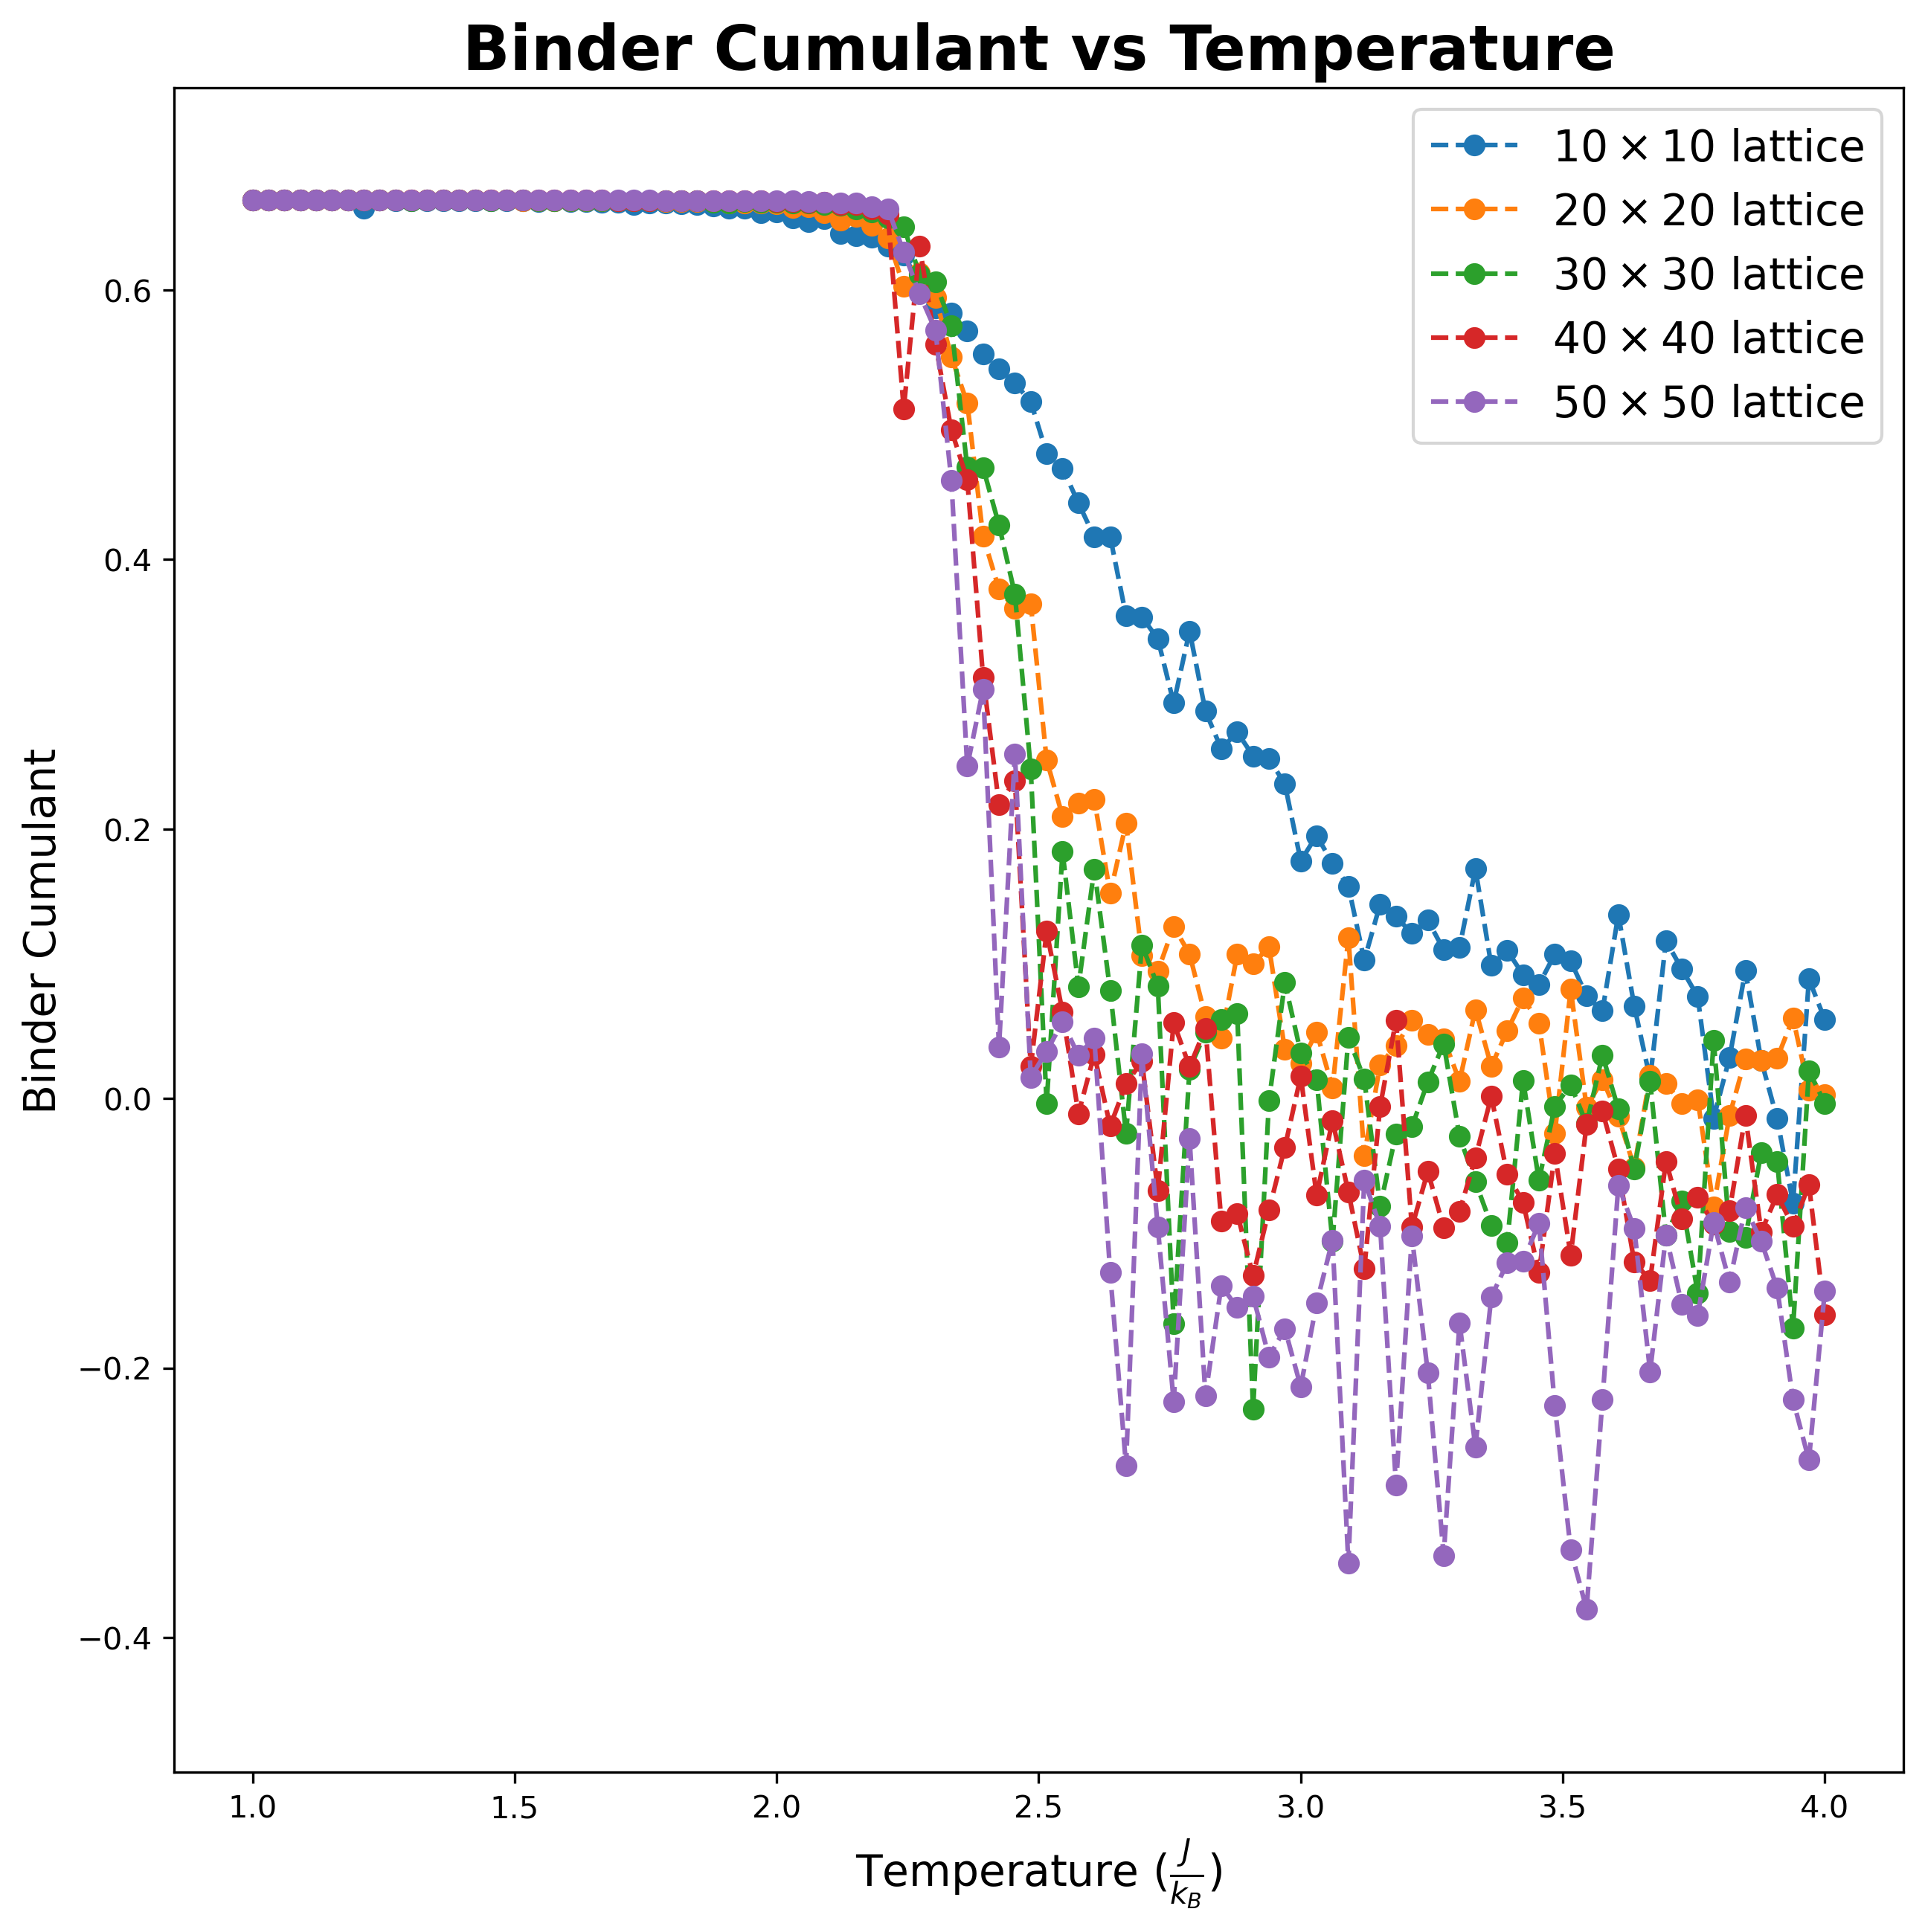

In [44]:
# plot binder cumulant
plt.figure(figsize=(10,10))
plt.plot(temperature, BC_10, 'o--', label='$10 \\times 10$ lattice')
plt.plot(temperature, BC_20, 'o--', label='$20 \\times 20$ lattice')
plt.plot(temperature, BC_30, 'o--', label='$30 \\times 30$ lattice')
plt.plot(temperature, BC_40, 'o--', label='$40 \\times 40$ lattice')
plt.plot(temperature, BC_50, 'o--', label='$50 \\times 50$ lattice')
plt.ylim(-0.5, 0.75)
plt.title('Binder Cumulant vs Temperature', fontsize=20, fontweight='bold')
plt.xlabel('Temperature ($\\frac{J}{k_B}$)',fontsize=14)
plt.ylabel('Binder Cumulant',fontsize=14)
plt.legend(fontsize=14)
plt.savefig("BC_vs temp.jpg")



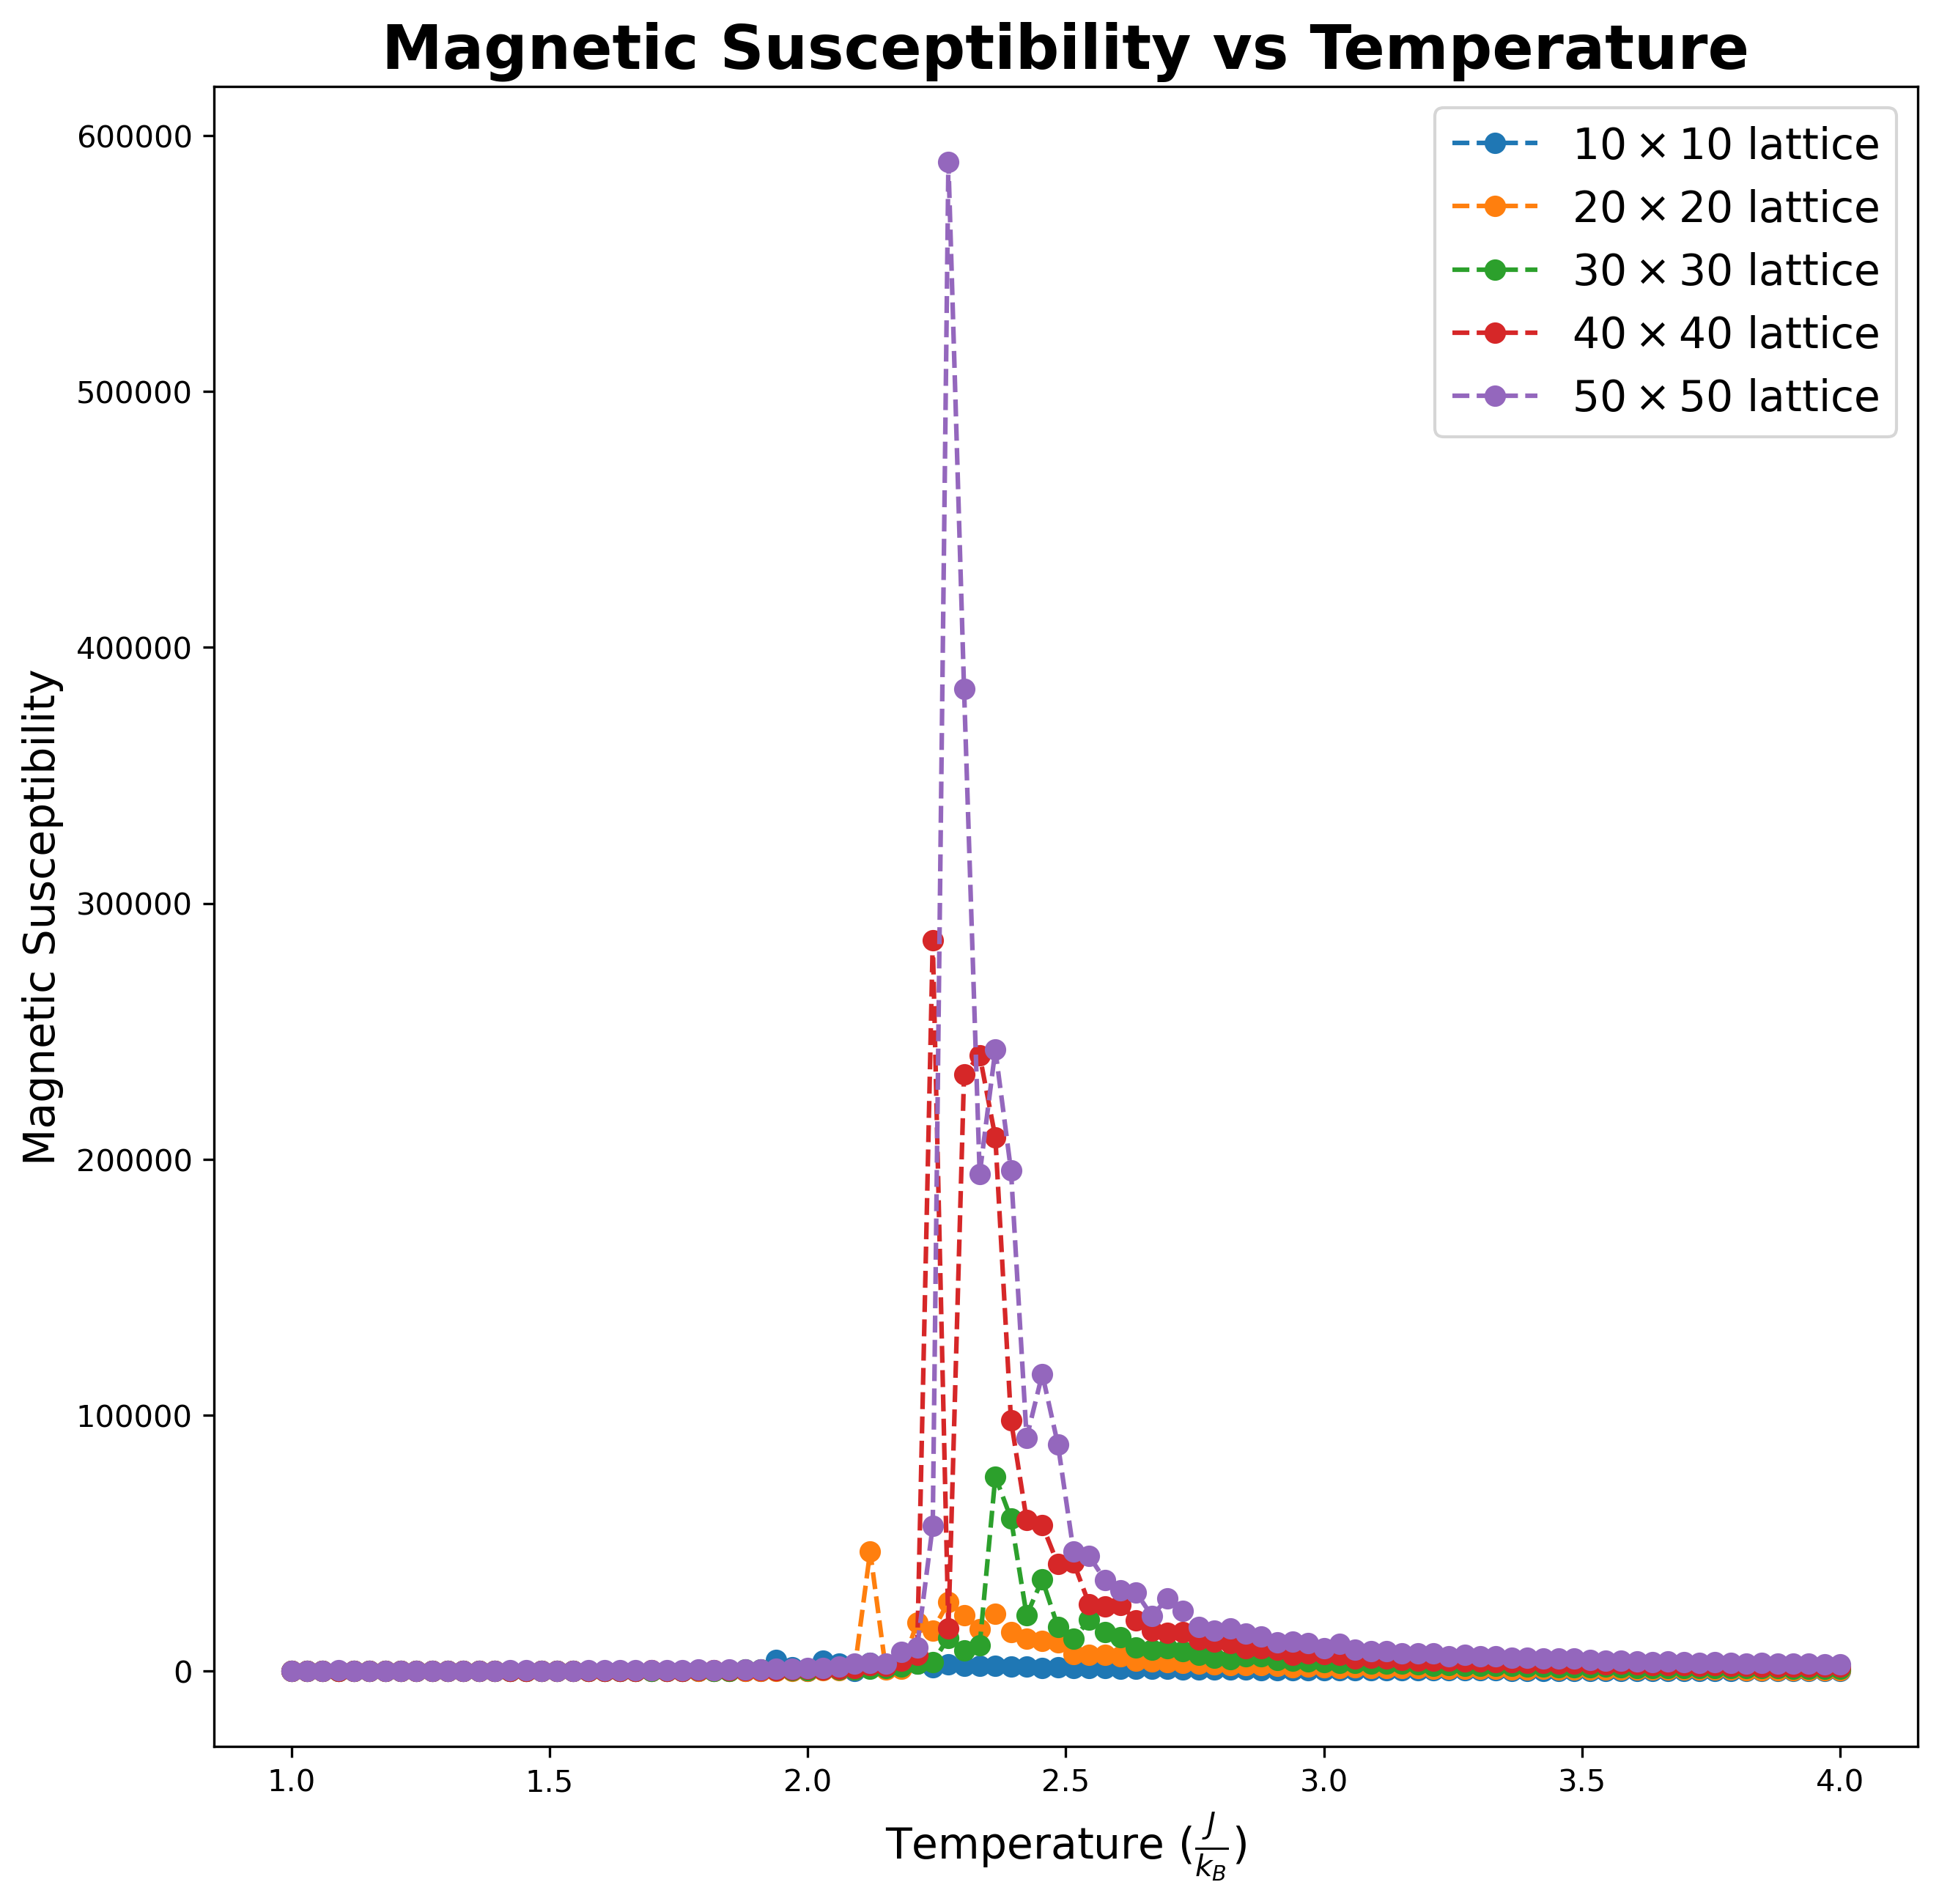

In [46]:
# plot magnetic susceptibility
plt.figure(figsize=(10,10))
plt.plot(temperature, MS_10, 'o--', label='$10 \\times 10$ lattice')
plt.plot(temperature, MS_20, 'o--', label='$20 \\times 20$ lattice')
plt.plot(temperature, MS_30, 'o--', label='$30 \\times 30$ lattice')
plt.plot(temperature, MS_40, 'o--', label='$40 \\times 40$ lattice')
plt.plot(temperature, MS_50, 'o--', label='$50 \\times 50$ lattice')
plt.title('Magnetic Susceptibility vs Temperature', fontsize=20, fontweight='bold')
plt.xlabel('Temperature ($\\frac{J}{k_B}$)',fontsize=14)
plt.ylabel('Magnetic Susceptibility',fontsize=14)
plt.legend(fontsize=14)
plt.savefig("MS_vs temp.jpg")



In [13]:
type(Lattice_eq_12)

NoneType